# read in image data

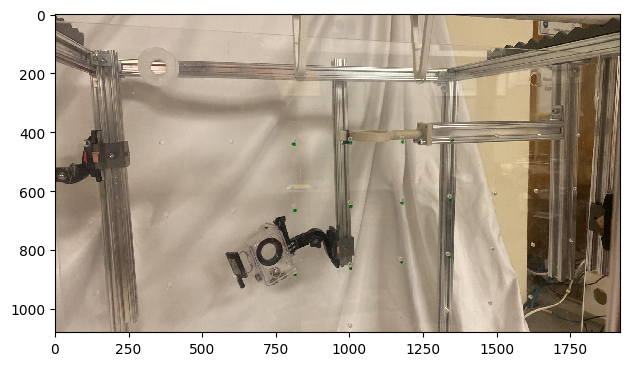

In [18]:
import skimage.io

image = skimage.io.imread('./image.jpg')
skimage.io.imshow(image)
#skimage.io.show()


# convert image to binary

c:\Users\darren\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


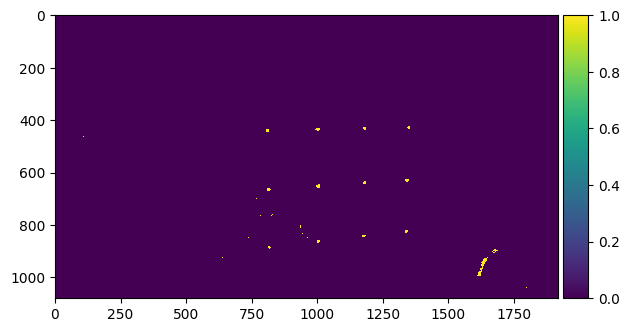

In [2]:
import matplotlib.pyplot as plt
from skimage.color import rgb2hsv
import numpy as np

image = skimage.io.imread('./image.jpg')

# Convert the image to the HSV color space
hsv_image = rgb2hsv(image)
    
# Extract the hue channel (green channel)
hue_channel = hsv_image[:, :, 0]
    
# Threshold the hue channel to obtain binary image
binary_image = np.where((hue_channel >= 0.25) & (hue_channel <= 0.45), 1, 0)

skimage.io.imshow(binary_image)


# calculate and display centroids of blobs

c:\Users\darren\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
C:\Users\darren\AppData\Local\Temp\ipykernel_6620\2979344821.py:27: UserWarning: testout.jpg is a low contrast image
  skimage.io.imsave("testout.jpg", rgb_image)


[(958.5460358056266, 1627.708439897698),
 (437.3693181818182, 1000.5681818181819),
 (653.3910256410256, 1003.0641025641025),
 (666.5294117647059, 813.4705882352941),
 (441.90410958904107, 808.986301369863),
 (898.7177419354839, 1678.1370967741937),
 (631.4098360655738, 1341.0573770491803),
 (430.9586776859504, 1346.8595041322315),
 (641.6153846153846, 1178.025641025641),
 (434.41284403669727, 1179.0642201834862),
 (843.0520833333334, 1176.0416666666667),
 (826.4883720930233, 1337.1860465116279)]

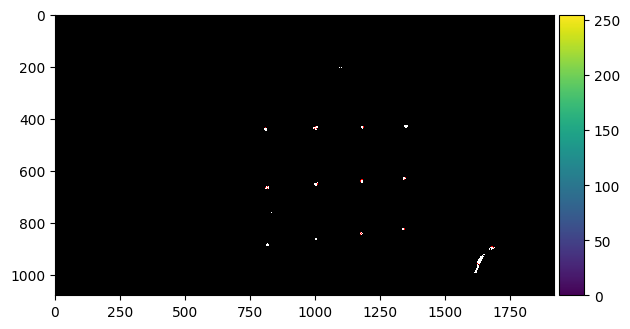

In [71]:
from skimage.measure import label,regionprops
import matplotlib.pyplot as plt
from skimage import morphology
from skimage.draw import circle_perimeter

#first denoise image
denoised_image = morphology.opening(binary_image, morphology.square(3))

# this block remakes the binary image as rgb image by setting all pixels with 0s to [0,0,0] and all pixels with 1s to [255,255,255]
rgb_image = np.zeros((denoised_image.shape[0], denoised_image.shape[1], 3), dtype=np.uint8)
rgb_image[denoised_image == 0] = [0,0,0]
rgb_image[denoised_image == 1] = [255,255,255]

#scikit-image tool for collecting connected components
label_im = label(denoised_image)
region_data = regionprops(label_im)
region_data = sorted(region_data, key=lambda x: x.area, reverse=True) #sorting regions based on area so that we grab the top 12 largest blobs

centroids = []
for r in region_data[:12]:
    centroids.append(r.centroid)
    rr, cc = circle_perimeter(int(r.centroid[0]), int(r.centroid[1]), 5)
    rgb_image[rr, cc, :] = (255,0,0)
    rgb_image[int(r.centroid[0]), int(r.centroid[1])] = (255,0,0)

skimage.io.imshow(rgb_image)
skimage.io.imsave("testout.jpg", rgb_image)
centroids

c:\Users\darren\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


[(957.9975186104218, 1628.2990074441686), (437.5357142857143, 1000.9081632653061), (653.6208791208791, 1003.0494505494505), (666.377245508982, 813.4251497005988), (441.82608695652175, 808.8819875776397), (431.1066666666667, 1346.82), (631.3108108108108, 1340.8851351351352), (641.7794117647059, 1177.75), (898.4666666666667, 1679.0), (434.1832061068702, 1178.7099236641222), (842.9401709401709, 1176.111111111111), (864.6792452830189, 1002.4811320754717), (826.2380952380952, 1337.1619047619047), (886.4747474747475, 815.2929292929293), (747.7727272727273, 898.3181818181819), (205.0, 1095.5), (700.8, 764.4), (903.9333333333333, 1667.2666666666667), (749.0, 926.0), (30.0, 1665.5), (762.0, 829.5), (34.0, 1662.0), (749.0, 862.0), (907.0, 1672.0), (1041.0, 1794.0)] [806, 196, 182, 167, 161, 150, 148, 136, 135, 131, 117, 106, 105, 99, 44, 42, 35, 30, 15, 12, 12, 9, 9, 9, 9]


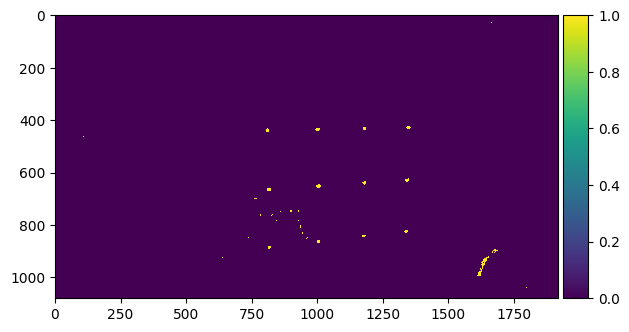

In [1]:
import skimage.io
from detect_centroids import *

centroids, areas = detect_centroids('./image.jpg', 120,40)
skimage.io.imshow(image_to_binary('./image.jpg',120,40))
print(centroids, areas)
